<a href="https://colab.research.google.com/github/chinu1997/Capstone3-Team4/blob/main/Chinmaya_Devprasad_team_4_of_News_Popularity_Prediction_in_Social_Media_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import nltk
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
import string
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
news_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Aravali/Module 4/Capstone-3 /Copy of News_Final.csv")

In [4]:
news_df.shape

(93239, 11)

In [5]:
news_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [6]:
news_df['Source'].value_counts()

Bloomberg                        1732
Reuters                          1321
ABC News                         1098
New York Times                    992
The Guardian                      933
                                 ... 
Chicago Inno                        1
Thelakeandeswave                    1
PC PowerPlay                        1
Richmond County Daily Journal       1
Agenda.ge                           1
Name: Source, Length: 5756, dtype: int64

In [7]:
news_df.dropna(inplace=True,axis=0)

In [8]:
news_df.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [9]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92945 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             92945 non-null  float64
 1   Title              92945 non-null  object 
 2   Headline           92945 non-null  object 
 3   Source             92945 non-null  object 
 4   Topic              92945 non-null  object 
 5   PublishDate        92945 non-null  object 
 6   SentimentTitle     92945 non-null  float64
 7   SentimentHeadline  92945 non-null  float64
 8   Facebook           92945 non-null  int64  
 9   GooglePlus         92945 non-null  int64  
 10  LinkedIn           92945 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 8.5+ MB


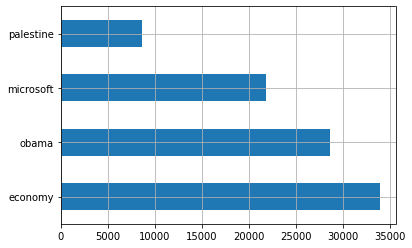

In [10]:
news_df['Topic'].value_counts().plot(kind='barh',grid=True)

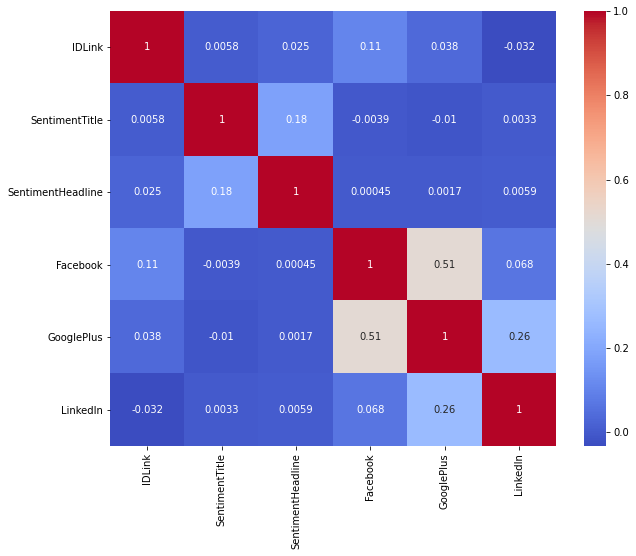

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data=news_df.corr(),cmap='coolwarm',annot=True)

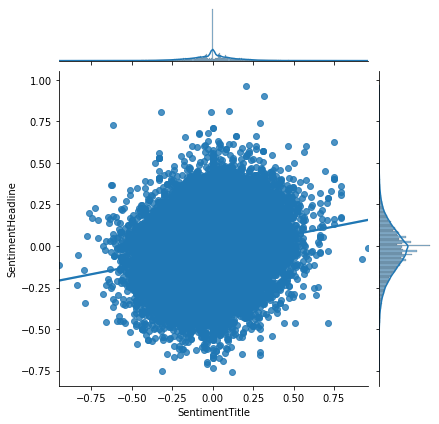

In [12]:
sns.jointplot(x='SentimentTitle',y='SentimentHeadline',data=news_df,kind = 'reg')
plt.show()

In [13]:
news_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [14]:
news_df['Text']=news_df['Title']+news_df['Headline']

In [15]:
def Change_text(msg):
  punc=[char for char in msg if char not in string.punctuation]
  no_punc=''.join(punc)
  main_text=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return ' '.join(main_text)

In [16]:
news_df['token_text']=news_df['Text'].apply(Change_text)


# **Linear Regression** 

# **On Facebook** 

In [17]:
X=news_df['token_text']
Y=news_df['Facebook']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
vector=TfidfVectorizer(max_df = 0.8,min_df = 8)

In [19]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [20]:
test_pred_text=pipe_title.predict(X_test)

In [21]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2 score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [22]:
print_metrics(Y_test,test_pred_text)

MSE is 422126.03507856163
RMSE is 649.7122709927538
r2 score is -0.1594327118754868
MAE is 277.9330093781675
MAPE is inf


# **On Linkedin**

In [23]:
X=news_df['token_text']
Y=news_df['LinkedIn']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [24]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [25]:
test_pred_text=pipe_title.predict(X_test)

In [26]:
print_metrics(Y_test,test_pred_text)

MSE is 29149.577414493466
RMSE is 170.73247322783521
r2 score is -0.027885464104569158
MAE is 48.84907695539932
MAPE is inf


# **On GooglePlus**

In [27]:
X=news_df['token_text']
Y=news_df['GooglePlus']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
model=LinearRegression()
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=8, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
  

In [29]:
test_pred_text=pipe_title.predict(X_test)

In [30]:
print_metrics(Y_test,test_pred_text)

MSE is 495.39768647323484
RMSE is 22.25753100577948
r2 score is -0.1386350988502787
MAE is 8.664402565122636
MAPE is inf


# **By using spacy library**

In [31]:
nlp = English()

In [32]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in STOP_WORDS and word not in string.punctuation ]

    return ' '.join(mytokens)

In [33]:
news_df['Spacy_token']=news_df['Text'].apply(spacy_tokenizer)

# **On Facebook** 

# **Random Forest model**

In [34]:
X=news_df['Spacy_token']
Y=news_df['Facebook']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [35]:
vector=TfidfVectorizer(max_df = 0.9,min_df = 9)

In [36]:
model=RandomForestRegressor(n_estimators=50,max_depth=None,random_state=0)
pipe_title = Pipeline([('vectorizer', vector),
                     ('regressor', model)])
pipe_title.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=9, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                      

In [39]:
test_pred_text=pipe_title.predict(X_test)

In [40]:
print_metrics(Y_test,test_pred_text)

MSE is 538674.1923775814
RMSE is 733.9442706211292
r2 score is 0.015130753873194513
MAE is 158.22328344744986
MAPE is inf


U

# **Vectorizer**

In [ ]:


tittle_vector=vectorize.fit_transform(news_df['token_text'])

In [ ]:
vectorize=TfidfVectorizer(max_df = 0.9,min_df = 10)

headline_vector=vectorize.fit_transform(news_df['tokenize_headline'])

In [ ]:

import numpy as np
import pandas as pd
import csv
from datetime import datetime
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
def parsedata(filename):
    articles = {}

    with open(filename, 'r') as csvfile:
        ifile = csv.reader(csvfile)
        next(ifile, None) #skip header
        for line in ifile:
            instance = []
            flag = False
            for val in line:
                if flag:
                    instance.append(val)
                else:
                    id_link = val
                    flag = True
            articles[id_link] = instance
            
    return articles



In [ ]:
def organize_topics(articles):
    topics = {'economy': [], 'microsoft': [], 'obama': [], 'palestine': []}

    for i in articles:
        if articles[i][3] == 'economy':
            topics['economy'].append(i)
        elif articles[i][3] == 'microsoft':
            topics['microsoft'].append(i)
        elif articles[i][3] == 'obama':
            topics['obama'].append(i)
        else:
            topics['palestine'].append(i)

    return topics



In [ ]:
def replace_NegOnes(articles, topics):
    econ_avg_fb, econ_avg_gp, econ_avg_li = get_avg_pop(articles, topics, 'economy')
    micro_avg_fb, micro_avg_gp, micro_avg_li = get_avg_pop(articles, topics, 'microsoft')
    obama_avg_fb, obama_avg_gp, obama_avg_li = get_avg_pop(articles, topics, 'obama')
    pal_avg_fb, pal_avg_gp, pal_avg_li = get_avg_pop(articles, topics, 'palestine')

    for i in articles:
        if articles[i][3] == 'economy':
            if float(articles[i][7]) == -1.:
                articles[i][7] = econ_avg_fb
            if float(articles[i][8]) == -1.:
                articles[i][8] = econ_avg_gp
            if float(articles[i][9]) == -1.:
                articles[i][9] = econ_avg_li
        elif articles[i][3] == 'microsoft':
            if float(articles[i][7]) == -1.:
                articles[i][7] = micro_avg_fb
            if float(articles[i][8]) == -1.:
                articles[i][8] = micro_avg_gp
            if float(articles[i][9]) == -1.:
                articles[i][9] = micro_avg_li
        elif articles[i][3] == 'obama':
            if float(articles[i][7]) == -1.:
                articles[i][7] = obama_avg_fb
            if float(articles[i][8]) == -1.:
                articles[i][8] = obama_avg_gp
            if float(articles[i][9]) == -1.:
                articles[i][9] = obama_avg_li
        else:
            if float(articles[i][7]) == -1.:
                articles[i][7] = pal_avg_fb
            if float(articles[i][8]) == -1.:
                articles[i][8] = pal_avg_gp
            if float(articles[i][9]) == -1.:
                articles[i][9] = pal_avg_li
    return articles



In [ ]:
rated_dummies = pd.get_dummies(news_df['Topic'])
news_df=pd.concat([news_df, rated_dummies], axis=1)

In [ ]:
def get_avg_pop(articles, topics_dict, topic):
    sum_fb = 0
    sum_gp = 0
    sum_li = 0
    count_fb = 0
    count_gp = 0
    count_li = 0

    for i in topics_dict[topic]:
        if float(articles[i][7]) != -1.:
            sum_fb += float(articles[i][7])
            count_fb += 1.
        if float(articles[i][8]) != -1.:
            sum_gp += float(articles[i][8])
            count_gp += 1.
        if float(articles[i][9]) != -1.:
            sum_li += float(articles[i][9])
            count_li += 1.
    avg_fb = sum_fb/count_fb
    avg_gp = sum_gp/count_gp
    avg_li = sum_li/count_li

    return avg_fb, avg_gp, avg_li

def add_seconds_from_date(articles):
    start_date = '1970-01-01 '
    for i in articles:
        date = articles[i][4].split(" ")
        date = start_date + date[1]
        articles[i][4] = get_seconds(date)

    return articles

def get_seconds(date):
    datetime_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return datetime_object.timestamp() - 28800.

def create_dataframe(articles):
    data_init = []
    for i in articles:
        temp = []
        fcount = 0
        for val in articles[i]:
            if fcount in (0, 1, 2):
                fcount += 1
                continue
            elif fcount == 3:
                if val == "economy":
                    temp.append(1)
                    temp.append(0)
                    temp.append(0)
                    temp.append(0)
                elif val == "microsoft":
                    temp.append(0)
                    temp.append(1)
                    temp.append(0)
                    temp.append(0)
                elif val == "obama":
                    temp.append(0)
                    temp.append(0)
                    temp.append(1)
                    temp.append(0)
                else:
                    temp.append(0)
                    temp.append(0)
                    temp.append(0)
                    temp.append(1)
            else:
                temp.append(float(val))
            fcount += 1
        data_init.append(temp)

    data = pd.DataFrame(np.matrix(data_init))
    data.columns = ['Economy', 'Microsoft', 'Obama', 'Palestine', 'Time (s)', 'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus', 'LinkedIn']

    return data


In [ ]:
articles = parsedata('/content/drive/MyDrive/Almabetter/Cohort Aravali/Module 4/Capstone-3 /Copy of News_Final.csv')
topics = organize_topics(articles)
articles2 = replace_NegOnes(articles, topics)
articles3 = add_seconds_from_date(articles2)
data = create_dataframe(articles)

In [ ]:
data.head()

,Economy,Microsoft,Obama,Palestine,Time (s),SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,0.0,0.0,1.0,0.0,-28800.0,0.000000,-0.053300,304.035623,7.227951,8.724642
1,1.0,0.0,0.0,0.0,-28800.0,0.208333,-0.156386,46.230544,1.779149,16.978678
2,1.0,0.0,0.0,0.0,-28800.0,-0.425210,0.139754,46.230544,1.779149,16.978678
3,1.0,0.0,0.0,0.0,-28440.0,0.000000,0.026064,46.230544,1.779149,16.978678
4,1.0,0.0,0.0,0.0,-28140.0,0.000000,0.141084,46.230544,1.779149,16.978678
